In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import sklearn.preprocessing
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from math import sqrt

import seaborn as sns

from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential,load_model
from keras.optimizers import Adam

In [ ]:
data = '/content/Database.csv'  # Replace with your long file path

In [ ]:
 df = pd.read_csv(data)

In [ ]:
 print("Shape of data=>",df.shape)

Shape of data=> (315648, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       315648 non-null  int64  
 1   Time             315648 non-null  object 
 2   Season           315648 non-null  int64  
 3   Day_of_the_week  315648 non-null  int64  
 4   DHI              315648 non-null  float64
 5   DNI              315648 non-null  float64
 6   GHI              315648 non-null  float64
 7   Wind_speed       315648 non-null  float64
 8   Humidity         315648 non-null  float64
 9   Temperature      315648 non-null  float64
 10  PV_production    315648 non-null  int64  
 11  Wind_production  315648 non-null  int64  
 12  Electric_demand  315648 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 31.3+ MB


In [ ]:
df.describe()

,Unnamed: 0,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
count,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000
mean,157823.500000,2.508212,2.998175,53.779907,288.058615,221.787985,2.545759,51.261462,17.472179,3555.139722,2019.642526,24833.695287
std,91119.873222,1.117189,1.997720,68.829995,336.057040,296.632914,1.042771,16.319826,7.701694,4371.602324,1300.285246,4859.658254
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.660000,11.572000,-0.540000,-145.000000,-2476.000000,14662.000000
25%,78911.750000,2.000000,1.000000,0.000000,0.000000,0.000000,1.760000,38.380000,11.200000,-34.000000,866.000000,21368.000000
50%,157823.500000,3.000000,3.000000,7.600000,38.000000,10.200000,2.340000,51.662000,16.700000,110.000000,1829.000000,23879.000000
75%,236735.250000,4.000000,5.000000,98.800000,601.600000,427.200000,3.160000,63.644000,22.800000,7952.000000,3053.000000,26814.000000
max,315647.000000,4.000000,6.000000,431.000000,999.800000,1058.200000,8.540000,88.688000,39.020000,13191.000000,5743.000000,47067.000000


In [ ]:
df

,Unnamed: 0,Time,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
0,0,2019-01-01-T00:00,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2810,22216
1,1,2019-01-01-T00:05,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2862,22106
2,2,2019-01-01-T00:10,1,1,0.0,0.0,0.0,2.88,56.194,1.78,0,2916,22130
3,3,2019-01-01-T00:15,1,1,0.0,0.0,0.0,2.88,56.344,1.74,0,2920,22040
4,4,2019-01-01-T00:20,1,1,0.0,0.0,0.0,2.84,56.440,1.72,0,2902,21963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,315643,2021-12-31-T23:35,4,4,0.0,0.0,0.0,1.64,64.898,5.68,-33,3778,22939
315644,315644,2021-12-31-T23:40,4,4,0.0,0.0,0.0,1.64,64.970,5.66,-32,3755,22855
315645,315645,2021-12-31-T23:45,4,4,0.0,0.0,0.0,1.64,65.042,5.64,-31,3751,22812
315646,315646,2021-12-31-T23:50,4,4,0.0,0.0,0.0,1.64,65.234,5.60,-32,3793,22723


In [ ]:
middle_data = df.iloc[5000:5005]  # Mengambil baris 2 hingga 3 (indeks 2 dan 3)
print(middle_data)

      Unnamed: 0               Time  Season  Day_of_the_week   DHI    DNI  \
5000        5000  2019-01-18-T08:40       1                4  63.6  353.6   
5001        5001  2019-01-18-T08:45       1                4  63.0  385.2   
5002        5002  2019-01-18-T08:50       1                4  70.6  328.0   
5003        5003  2019-01-18-T08:55       1                4  63.8  460.4   
5004        5004  2019-01-18-T09:00       1                4  65.8  453.4   

        GHI  Wind_speed  Humidity  Temperature  PV_production  \
5000  169.6        2.90    75.326        10.96           4034   
5001  182.2        2.90    74.592        11.12           4286   
5002  178.8        2.94    74.064        11.24           4686   
5003  214.6        2.94    73.348        11.40           5088   
5004  220.8        2.96    72.868        11.52           5278   

      Wind_production  Electric_demand  
5000             2293            24593  
5001             2329            24542  
5002             2372  

In [ ]:
df.describe()

,Unnamed: 0,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
count,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000
mean,157823.500000,2.508212,2.998175,53.779907,288.058615,221.787985,2.545759,51.261462,17.472179,3555.139722,2019.642526,24833.695287
std,91119.873222,1.117189,1.997720,68.829995,336.057040,296.632914,1.042771,16.319826,7.701694,4371.602324,1300.285246,4859.658254
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.660000,11.572000,-0.540000,-145.000000,-2476.000000,14662.000000
25%,78911.750000,2.000000,1.000000,0.000000,0.000000,0.000000,1.760000,38.380000,11.200000,-34.000000,866.000000,21368.000000
50%,157823.500000,3.000000,3.000000,7.600000,38.000000,10.200000,2.340000,51.662000,16.700000,110.000000,1829.000000,23879.000000
75%,236735.250000,4.000000,5.000000,98.800000,601.600000,427.200000,3.160000,63.644000,22.800000,7952.000000,3053.000000,26814.000000
max,315647.000000,4.000000,6.000000,431.000000,999.800000,1058.200000,8.540000,88.688000,39.020000,13191.000000,5743.000000,47067.000000


In [ ]:
df.isnull().sum()

Unnamed: 0         0
Time               0
Season             0
Day_of_the_week    0
DHI                0
DNI                0
GHI                0
Wind_speed         0
Humidity           0
Temperature        0
PV_production      0
Wind_production    0
Electric_demand    0
dtype: int64

In [ ]:
# Convert the 'Time' column to DateTime format with the correct format
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d-T%H:%M')

# Print the DataFrame to verify the conversion
print(df)

        Unnamed: 0                Time  Season  Day_of_the_week  DHI  DNI  \
0                0 2019-01-01 00:00:00       1                1  0.0  0.0   
1                1 2019-01-01 00:05:00       1                1  0.0  0.0   
2                2 2019-01-01 00:10:00       1                1  0.0  0.0   
3                3 2019-01-01 00:15:00       1                1  0.0  0.0   
4                4 2019-01-01 00:20:00       1                1  0.0  0.0   
...            ...                 ...     ...              ...  ...  ...   
315643      315643 2021-12-31 23:35:00       4                4  0.0  0.0   
315644      315644 2021-12-31 23:40:00       4                4  0.0  0.0   
315645      315645 2021-12-31 23:45:00       4                4  0.0  0.0   
315646      315646 2021-12-31 23:50:00       4                4  0.0  0.0   
315647      315647 2021-12-31 23:55:00       4                4  0.0  0.0   

        GHI  Wind_speed  Humidity  Temperature  PV_production  \
0       0.

In [ ]:
df = df.drop(['Unnamed: 0', 'Electric_demand','Wind_production','Day_of_the_week','Season'], axis=1)

In [ ]:
df.head()

,Time,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production
0,2019-01-01 00:00:00,0.0,0.0,0.0,2.88,56.036,1.82,0
1,2019-01-01 00:05:00,0.0,0.0,0.0,2.88,56.036,1.82,0
2,2019-01-01 00:10:00,0.0,0.0,0.0,2.88,56.194,1.78,0
3,2019-01-01 00:15:00,0.0,0.0,0.0,2.88,56.344,1.74,0
4,2019-01-01 00:20:00,0.0,0.0,0.0,2.84,56.440,1.72,0


# Visualization

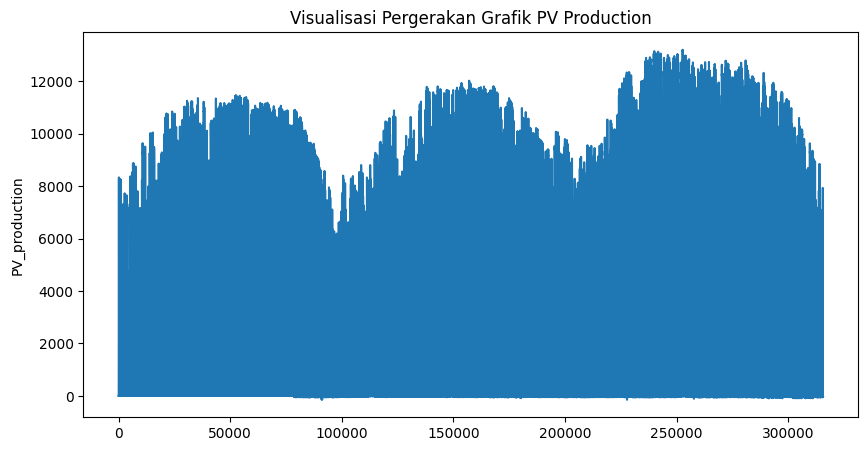

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['PV_production'].plot()
plt.ylabel('PV_production')
plt.title("Visualisasi Pergerakan Grafik PV Production")

plt.show()

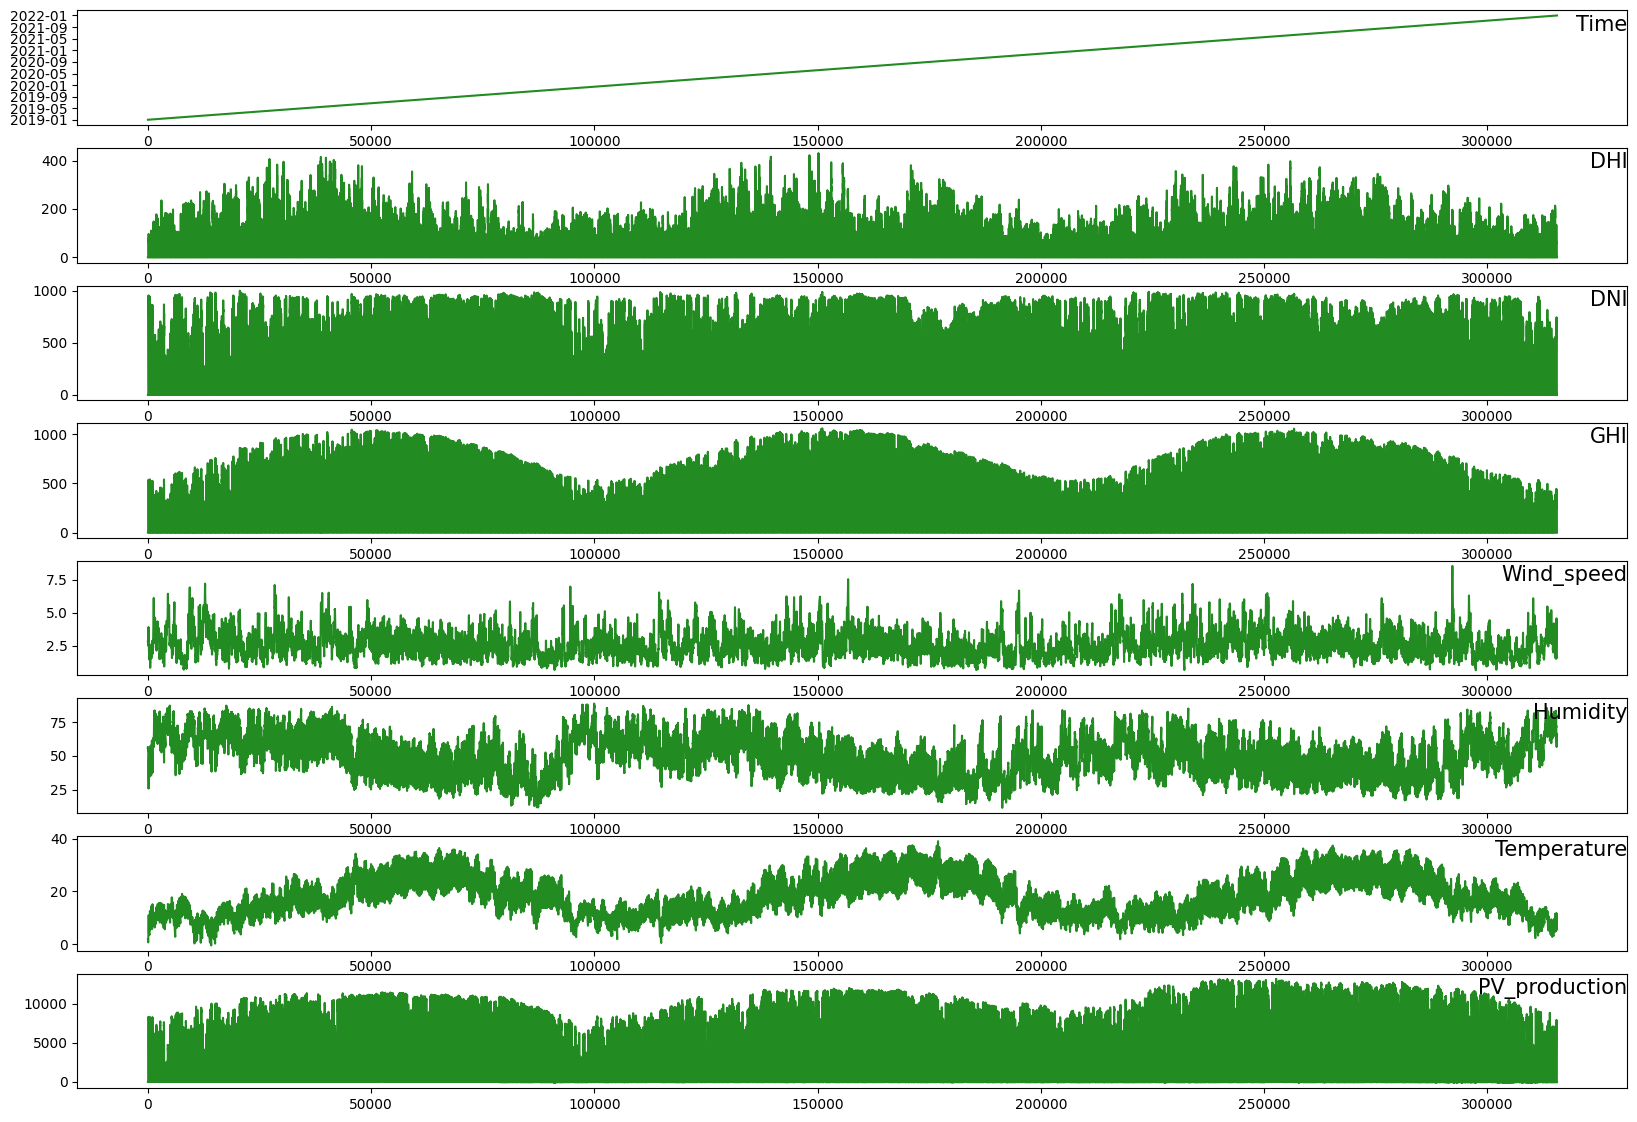

In [ ]:
values = df.values

# specify columns to plot
groups = range(df.shape[1])
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

korelasi

<ipython-input-114-40cb62c4f1a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


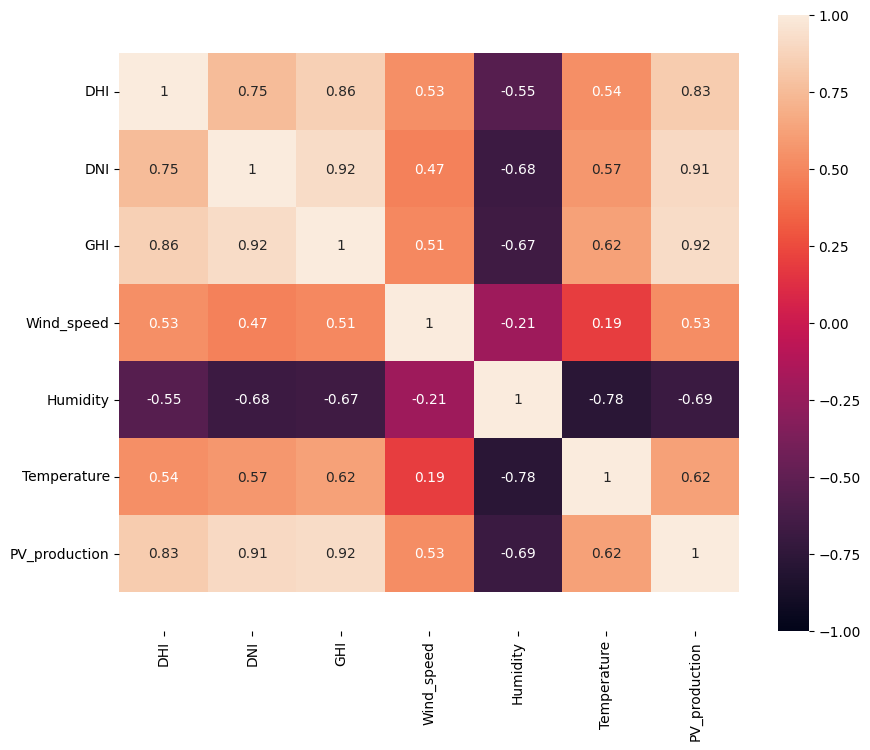

,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production
DHI,1.000000,0.751256,0.858813,0.533452,-0.547314,0.538361,0.831700
DNI,0.751256,1.000000,0.915774,0.471966,-0.683504,0.573619,0.905016
GHI,0.858813,0.915774,1.000000,0.506684,-0.666686,0.624181,0.915301
Wind_speed,0.533452,0.471966,0.506684,1.000000,-0.211321,0.187664,0.530953
Humidity,-0.547314,-0.683504,-0.666686,-0.211321,1.000000,-0.775161,-0.690560
Temperature,0.538361,0.573619,0.624181,0.187664,-0.775161,1.000000,0.624932
PV_production,0.831700,0.905016,0.915301,0.530953,-0.690560,0.624932,1.000000


In [ ]:
#correlation between the values
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

# scalling data dan supervised learning

In [ ]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]

    df = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [ ]:
del df["Time"]

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Scaling the entire dataset

dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
scaled

array([[0.        , 0.        , 0.        , ..., 0.5765859 , 0.05965622,
        0.01087283],
       [0.        , 0.        , 0.        , ..., 0.5765859 , 0.05965622,
        0.01087283],
       [0.        , 0.        , 0.        , ..., 0.57863474, 0.0586451 ,
        0.01087283],
       ...,
       [0.        , 0.        , 0.        , ..., 0.693371  , 0.1562184 ,
        0.00854829],
       [0.        , 0.        , 0.        , ..., 0.69586074, 0.15520728,
        0.00847331],
       [0.        , 0.        , 0.        , ..., 0.6968203 , 0.15470171,
        0.00847331]], dtype=float32)

In [ ]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

(315647, 14)


In [ ]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0        0.0        0.0   0.281726   0.576586   0.059656   
2        0.0        0.0        0.0   0.281726   0.576586   0.059656   
3        0.0        0.0        0.0   0.281726   0.578635   0.058645   
4        0.0        0.0        0.0   0.281726   0.580580   0.057634   
5        0.0        0.0        0.0   0.276650   0.581825   0.057128   

   var7(t-1)  var1(t)  var2(t)  var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.010873      0.0      0.0      0.0  0.281726  0.576586  0.059656   
2   0.010873      0.0      0.0      0.0  0.281726  0.578635  0.058645   
3   0.010873      0.0      0.0      0.0  0.281726  0.580580  0.057634   
4   0.010873      0.0      0.0      0.0  0.276650  0.581825  0.057128   
5   0.010873      0.0      0.0      0.0  0.274112  0.583614  0.056117   

    var7(t)  
1  0.010873  
2  0.010873  
3  0.010873  
4  0.010873  
5  0.010873  


In [ ]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)',
       'var5(t)', 'var6(t)', 'var7(t)'],
      dtype='object')

In [ ]:
# drop yang tidak ingin dipredict

reframed.drop(reframed.columns[[6,7,8,9,10,11,12]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var7(t)
1        0.0        0.0        0.0   0.281726   0.576586   0.059656  0.010873
2        0.0        0.0        0.0   0.281726   0.576586   0.059656  0.010873
3        0.0        0.0        0.0   0.281726   0.578635   0.058645  0.010873
4        0.0        0.0        0.0   0.281726   0.580580   0.057634  0.010873
5        0.0        0.0        0.0   0.276650   0.581825   0.057128  0.010873


In [ ]:
values = reframed.values

# We train the model on the 1st 2 years and then test on the last year
n_train = int((365 * 2 * 24 * 60) / 5)

train = values[:n_train, :]
test = values[n_train:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(210240, 1, 6) (210240,) (105407, 1, 6) (105407,)


In [ ]:
train.shape, test.shape, values.shape

((210240, 7), (105407, 7), (315647, 7))

In [ ]:
train

array([[0.        , 0.        , 0.        , ..., 0.5765859 , 0.05965622,
        0.01087283],
       [0.        , 0.        , 0.        , ..., 0.5765859 , 0.05965622,
        0.01087283],
       [0.        , 0.        , 0.        , ..., 0.57863474, 0.0586451 ,
        0.01087283],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6213496 , 0.2249747 ,
        0.00779844],
       [0.        , 0.        , 0.        , ..., 0.6229835 , 0.22446916,
        0.00779844],
       [0.        , 0.        , 0.        , ..., 0.6236578 , 0.22396359,
        0.00779844]], dtype=float32)

# build model LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
# Tentukan learning rate yang diinginkan
learning_rate = 0.00001 # Misalnya, nilai 0.001

# Menentukan parameter model
input_shape = (train_X.shape[1], train_X.shape[2])

# Membangun model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=input_shape)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(1))

# Mengkompilasi model
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

# Melatih model
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.3, verbose=2, shuffle=False)

Epoch 1/50
2044/2044 - 38s - loss: 0.1142 - val_loss: 0.0920 - 38s/epoch - 19ms/step
Epoch 2/50
2044/2044 - 23s - loss: 0.0481 - val_loss: 0.0304 - 23s/epoch - 11ms/step
Epoch 3/50
2044/2044 - 24s - loss: 0.0211 - val_loss: 0.0128 - 24s/epoch - 12ms/step
Epoch 4/50
2044/2044 - 24s - loss: 0.0158 - val_loss: 0.0115 - 24s/epoch - 12ms/step
Epoch 5/50
2044/2044 - 24s - loss: 0.0151 - val_loss: 0.0113 - 24s/epoch - 12ms/step
Epoch 6/50
2044/2044 - 25s - loss: 0.0147 - val_loss: 0.0113 - 25s/epoch - 12ms/step
Epoch 7/50
2044/2044 - 24s - loss: 0.0144 - val_loss: 0.0112 - 24s/epoch - 12ms/step
Epoch 8/50
2044/2044 - 23s - loss: 0.0140 - val_loss: 0.0112 - 23s/epoch - 11ms/step
Epoch 9/50
2044/2044 - 23s - loss: 0.0138 - val_loss: 0.0111 - 23s/epoch - 11ms/step
Epoch 10/50
2044/2044 - 24s - loss: 0.0136 - val_loss: 0.0111 - 24s/epoch - 12ms/step
Epoch 11/50
2044/2044 - 23s - loss: 0.0134 - val_loss: 0.0111 - 23s/epoch - 11ms/step
Epoch 12/50
2044/2044 - 22s - loss: 0.0134 - val_loss: 0.0110 -

#Evaluasi Model

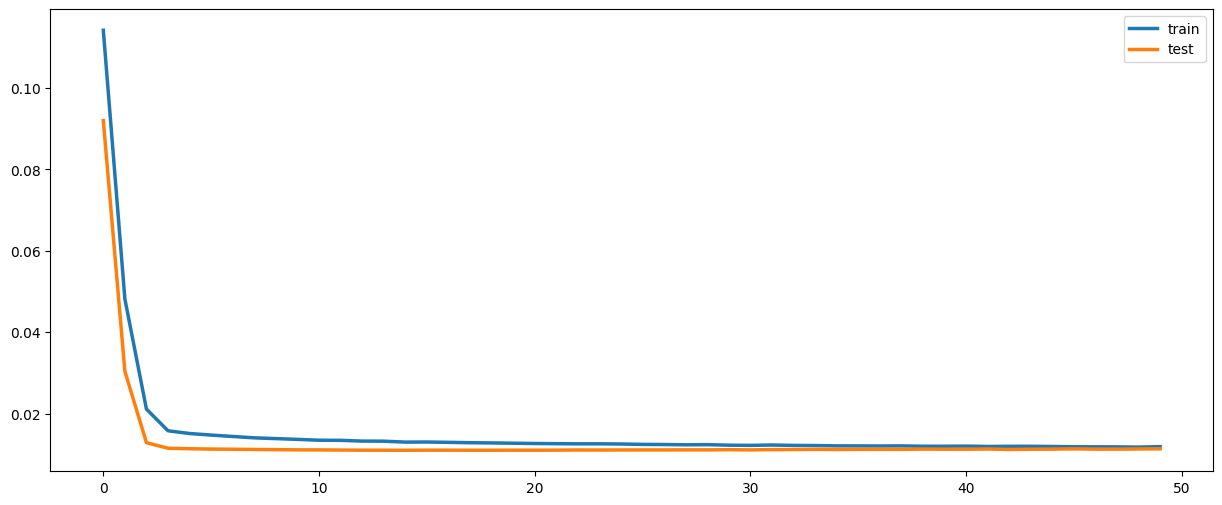

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [ ]:
test_X.shape

(105407, 1, 6)

In [ ]:
test.shape

(105407, 7)

In [ ]:
model.save('modelDL.h5')

loaded_model = load_model('modelDL.h5')

testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

3294/3294 [==============================] - 22s 4ms/step
(105407, 1)
(105407,)


In [ ]:
y_test_true = test[:,6]

In [ ]:
poll = np.array(df["PV_production"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

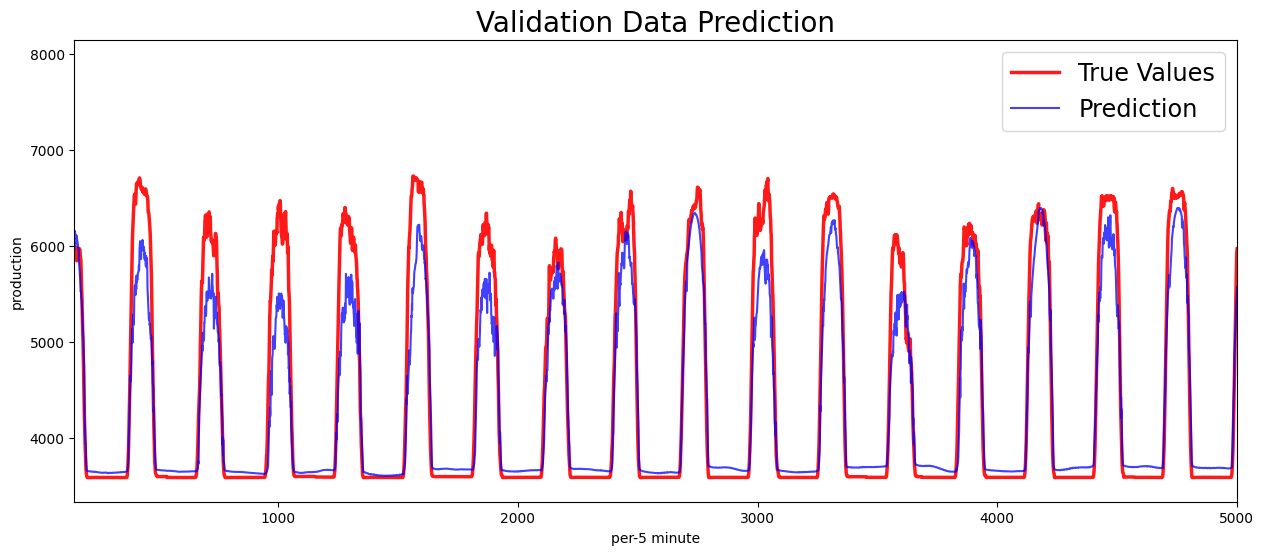

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([150,5000])
plt.ylabel('production')
plt.xlabel("per-5 minute")
plt.plot(y_test_true, c = "r", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Validation Data Prediction", fontsize=20)
plt.legend(['True Values', 'Prediction'], fontsize='xx-large')
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(y_test_true, testPredict))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 523.22775
